# Natural Language Processing Project

This Natural Language Processing prject will focus on classifying yelp reviews into star ratings from 1 star to 5 stars based on key words within the yelp review.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013) dataset within this project.

Each observation in this dataset is a review of a particular business by a particular user.

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## Loading The Data:

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column:**

In [6]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploratory Data Analysis:

**Plotting the review text length per star:**

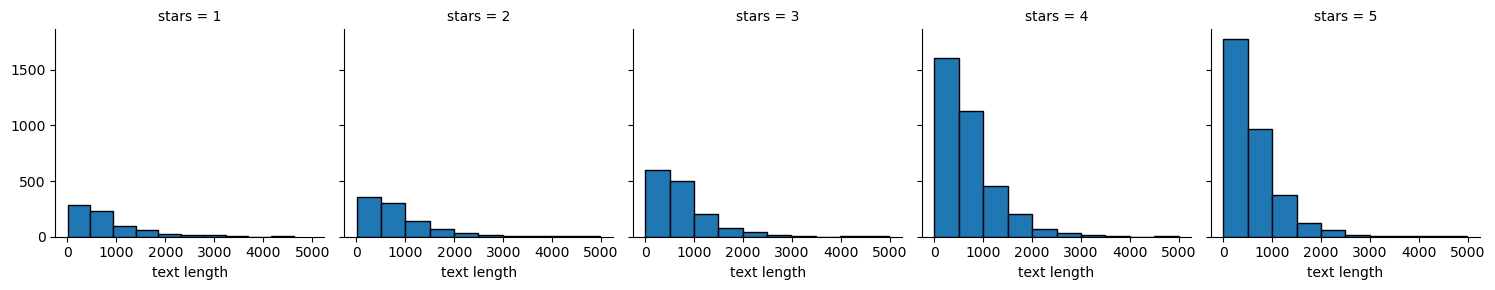

In [7]:
sns.FacetGrid(data = yelp, col = 'stars').map(plt.hist, 'text length', ec = 'black')


**Creating a boxplot of the same data:**

<Axes: xlabel='stars', ylabel='text length'>

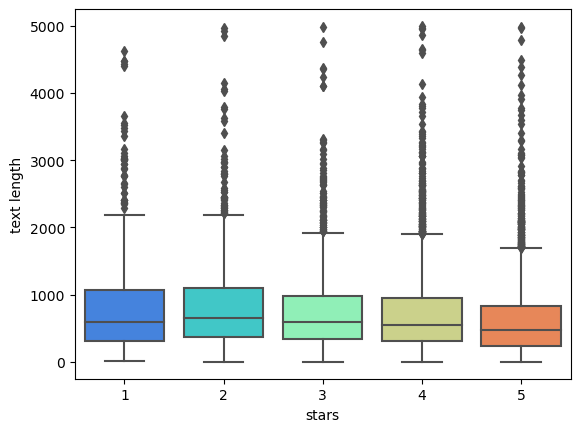

In [8]:
sns.boxplot(data = yelp, x = 'stars', y = 'text length', palette = 'rainbow')

**Plotting the occurence of each star rating:**

<Axes: title={'center': 'Occurence of Star Rating'}, xlabel='stars', ylabel='count'>

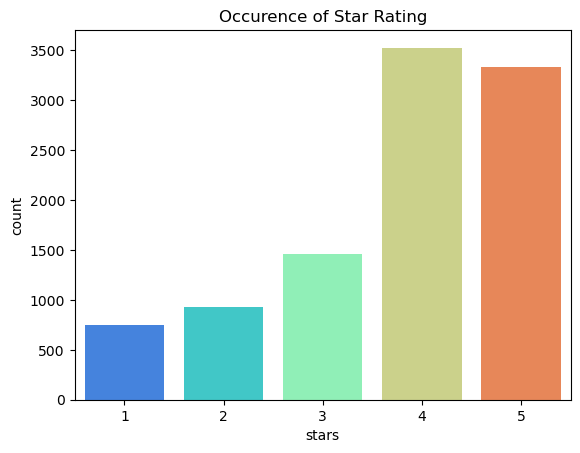

In [9]:
plt.title('Occurence of Star Rating')
sns.countplot(data = yelp, x = 'stars', palette = 'rainbow')

**Using the groupby function to create a matrix of the mean occurence of a word per star rating:**

In [10]:
by_stars = yelp.groupby('stars').mean(numeric_only = True)
by_stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**getting the correlation from the by_stars matrix:**

In [11]:
corr = by_stars.corr()
corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: title={'center': 'Word and Rating Correlation'}>

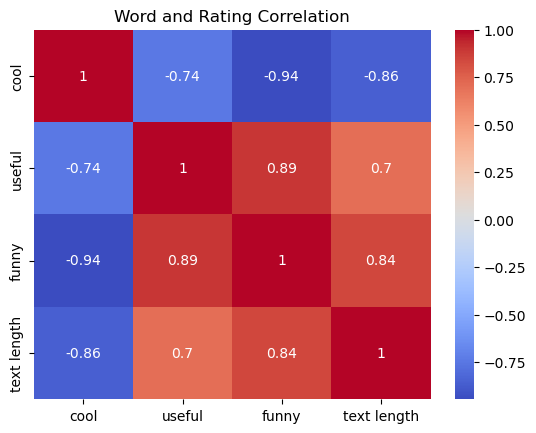

In [12]:
plt.title('Word and Rating Correlation')
sns.heatmap(data = corr, cmap = 'coolwarm', annot = True)

## NLP Classification Task:

**Creating a dataframe called yelp_class that contains the columns of the yelp dataframe but for only the 1 or 5 star reviews:**

In [13]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars'] == 5)]
yelp_class.head() 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


### Splitting the training and test data:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

### Importing the CountVectorizer and creating a CountVectorizer object:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
X_new = cv.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.30, random_state=101)

## Training The Model:
**Importing MultinomialNB and creating an instance of the estimator and call is nb:**

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [20]:
nb.fit(X_train,y_train)

MultinomialNB()

## Evaluating the Model:

In [21]:
prediction = nb.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test, prediction))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## Now Using Text Processing:

**Importing TfidfTransformer from sklearn:**

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
from sklearn.pipeline import Pipeline

**Creating a pipeline with the following steps: CountVectorizer(), TfidfTransformer(),MultinomialNB():**

In [26]:
from sklearn.naive_bayes import BernoulliNB

### Syntax:
pipe = Pipeline([
    ('bow' , CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model',  BernoulliNB())
])

In [27]:
pipe = Pipeline([
    ('bow' , CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model',  BernoulliNB())
])

In [28]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', BernoulliNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [30]:
predictions = pipe.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 87 141]
 [ 54 944]]
              precision    recall  f1-score   support

           1       0.62      0.38      0.47       228
           5       0.87      0.95      0.91       998

    accuracy                           0.84      1226
   macro avg       0.74      0.66      0.69      1226
weighted avg       0.82      0.84      0.83      1226



### In this project, with its specific parameters, the Multinomial Naive Bayes model performed better than the tfidfTransformer and Bernoulli Naive Bayes Model. It can always be improved. 